# **Project Title: Predict Canada’s home prices using deep learning mode**l

The goal of this project is to generate a deep learning model to predict Canada’s home prices by using the following data available online.   



1.     MLS® Home Price Index (HPI): https://www.crea.ca/housing-market-stats/mls-home-price-index/hpi-tool/

2.     Consumer Price Index (CPI). https://www.bankofcanada.ca/rates/price-indexes/cpi/

3.     Canada Prime rate and Bank of Canada Interest Rate: https://moneywise.ca/news/economy/what-is-the-prime-rate-in-canada

**Importing the libraries**

In [1]:
#importing the python libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt



**Data Collection**

In [2]:
#importing the data
hpi_data_seasonal = pd.read_excel('/content/Seasonally Adjusted.xlsx',sheet_name="SASKATCHEWAN")
hpi_data_non_seosonal = pd.read_excel('/content/Not Seasonally Adjusted.xlsx', sheet_name="Saskatchewan")

cpi_data = pd.read_csv('/content/CPI_MONTHLY.csv', skiprows= 25)#skip 25 rows to remove invalid data
interest_rates_data = pd.read_excel('/content/prime_rate_canada.xlsx')

In [3]:
cpi_data = cpi_data.rename(columns={"date":"Date"})
cpi_data

,Date,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
0,1995-01-01,86.6,86.6,0.6,1.8,1.8,1.2,NaN,2.2,1.7
1,1995-02-01,87.0,87.0,1.9,1.9,1.8,1.2,NaN,1.8,1.7
2,1995-03-01,87.2,87.2,2.1,2.0,1.8,1.5,NaN,2.1,1.9
3,1995-04-01,87.5,87.4,2.5,2.1,2.0,1.5,NaN,2.1,2.0
4,1995-05-01,87.7,87.7,2.9,2.3,2.1,1.9,NaN,2.6,2.2
...,...,...,...,...,...,...,...,...,...,...
341,2023-06-01,157.2,156.5,2.8,3.8,4.1,5.1,3.2,3.5,4.4
342,2023-07-01,158.1,157.4,3.3,3.7,4.0,4.8,3.2,3.4,4.2
343,2023-08-01,158.7,158.4,4.0,4.0,4.2,4.8,3.3,3.6,4.5
344,2023-09-01,158.5,158.6,3.8,3.7,3.9,4.4,2.8,3.2,4.2


In [4]:
#print the random sample data
hpi_data_non_seosonal.sample(5)

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark
57,2009-10-01,208.1,208.5,210.6,200.8,204.6,215.1,231200,235000,216500,284400,225300,194200
100,2013-05-01,265.2,269.5,272.8,251.4,252.1,254.8,294600,303700,280400,356000,277600,230100
167,2018-12-01,250.2,257.6,252.7,247.5,221.2,214.4,278000,290300,259800,350400,243500,193600
190,2020-11-01,263.2,273.7,263.7,265.9,229.1,206.5,292400,308500,271100,376500,252200,186500
32,2007-09-01,181.3,179.4,180.7,176.5,197.4,204.8,201400,202200,185800,249900,217300,184900


In [5]:
#print the random sample data
hpi_data_seasonal.sample(5)

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
218,2023-03-01,286.0,298.9,282.3,295.7,248.0,233.1,321800,341100,294200,424400,273100,210500
20,2006-09-01,118.1,118.8,119.3,116.7,113.9,111.3,132900,135600,124300,167400,125400,100500
91,2012-08-01,254.3,258.6,262.7,241.0,241.6,246.5,286100,295100,273700,345800,266000,222600
2,2005-03-01,99.6,99.7,100.3,99.2,101.0,99.4,112100,113800,104500,142300,111200,89800
114,2014-07-01,264.9,269.3,270.4,252.8,252.3,258.1,298000,307300,281800,362800,277800,233100


In [6]:
#print the random sample data
interest_rates_data.sample(5)

,Date,Prime Rate,Target for the Overnight Rate
3,2023-06-01,0.0695,0.0475
8,2022-10-01,0.0595,0.0375
1,2023-09-01,0.0720,0.0500
18,2018-01-01,0.0345,0.0125
16,2018-10-01,0.0395,0.0150


In [7]:
#describe the dataframe
cpi_data.describe()


,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,286.000000,346.000000,346.000000
mean,115.449133,115.440751,2.114451,1.963006,2.011850,2.075145,2.014685,1.802023,2.002890
std,18.573162,18.560281,1.329016,0.869693,0.797171,0.969336,0.993061,0.909226,0.994444
min,86.600000,86.600000,-0.900000,0.800000,0.900000,0.900000,0.700000,0.500000,0.700000
25%,99.050000,98.950000,1.300000,1.425000,1.600000,1.600000,1.500000,1.300000,1.425000
50%,114.750000,114.750000,2.000000,1.800000,1.800000,1.900000,1.800000,1.700000,1.800000
75%,128.775000,128.600000,2.500000,2.100000,2.100000,2.200000,2.200000,2.000000,2.100000
max,158.700000,158.600000,8.100000,5.600000,5.500000,6.200000,6.200000,5.500000,6.400000


In [8]:
#info about dataframe
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   346 non-null    object 
 1   V41690973              346 non-null    float64
 2   V41690914              346 non-null    float64
 3   STATIC_TOTALCPICHANGE  346 non-null    float64
 4   CPI_TRIM               346 non-null    float64
 5   CPI_MEDIAN             346 non-null    float64
 6   CPI_COMMON             346 non-null    float64
 7   ATOM_V41693242         286 non-null    float64
 8   STATIC_CPIXFET         346 non-null    float64
 9   CPIW                   346 non-null    float64
dtypes: float64(9), object(1)
memory usage: 27.2+ KB


In [9]:
#describe the dataframe
hpi_data_non_seosonal.describe()


,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,234.894273,240.036564,237.896476,230.081057,217.168282,214.021586,260968.281938,270524.229075,244559.911894,325797.797357,239103.083700,193261.674009
std,53.202153,56.677250,53.744156,53.878568,43.460780,42.381644,59107.904613,63877.444769,55247.560519,76294.213031,47854.669733,38272.024521
min,100.000000,100.000000,100.000000,100.000000,100.000000,98.700000,111100.000000,112700.000000,102800.000000,141600.000000,110100.000000,89100.000000
25%,218.750000,218.000000,221.700000,208.000000,218.650000,206.800000,243050.000000,245700.000000,227900.000000,294550.000000,240700.000000,186750.000000
50%,256.100000,262.100000,260.000000,249.800000,229.200000,227.700000,284500.000000,295400.000000,267300.000000,353700.000000,252300.000000,205600.000000
75%,266.250000,272.750000,272.150000,257.550000,245.050000,237.450000,295850.000000,307350.000000,279750.000000,364650.000000,269800.000000,214400.000000
max,300.800000,315.700000,301.200000,313.600000,263.200000,261.700000,334200.000000,355800.000000,309600.000000,444100.000000,289800.000000,236300.000000


In [10]:
#info about dataframe
hpi_data_non_seosonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     227 non-null    datetime64[ns]
 1   Composite_HPI            227 non-null    float64       
 2   Single_Family_HPI        227 non-null    float64       
 3   One_Storey_HPI           227 non-null    float64       
 4   Two_Storey_HPI           227 non-null    float64       
 5   Townhouse_HPI            227 non-null    float64       
 6   Apartment_HPI            227 non-null    float64       
 7   Composite_Benchmark      227 non-null    int64         
 8   Single_Family_Benchmark  227 non-null    int64         
 9   One_Storey_Benchmark     227 non-null    int64         
 10  Two_Storey_Benchmark     227 non-null    int64         
 11  Townhouse_Benchmark      227 non-null    int64         
 12  Apartment_Benchmark      227 non-nul

In [11]:
#describe the dataframe
hpi_data_seasonal.describe()

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,231.925551,237.052863,234.655066,226.996035,217.151542,213.996476,260918.942731,270472.687225,244512.775330,325741.850220,239083.259912,193238.325991
std,52.449315,55.885997,52.907268,53.077040,43.400992,42.284845,59005.909729,63765.310522,55130.113711,76165.082482,47788.333841,38184.589891
min,99.600000,99.700000,100.000000,99.200000,100.000000,98.700000,112100.000000,113800.000000,104200.000000,142300.000000,110100.000000,89100.000000
25%,213.200000,212.450000,215.900000,203.400000,218.850000,207.950000,239850.000000,242400.000000,225000.000000,291900.000000,240950.000000,187750.000000
50%,251.700000,258.600000,255.700000,247.000000,230.500000,227.500000,283200.000000,295100.000000,266400.000000,354500.000000,253800.000000,205400.000000
75%,262.900000,268.300000,268.250000,253.200000,245.600000,237.850000,295800.000000,306150.000000,279550.000000,363350.000000,270400.000000,214800.000000
max,292.900000,306.000000,291.300000,305.400000,262.900000,258.100000,329500.000000,349100.000000,303500.000000,438200.000000,289500.000000,233100.000000


In [12]:
#print the info about the dataframe
hpi_data_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        227 non-null    datetime64[ns]
 1   Composite_HPI_SA            227 non-null    float64       
 2   Single_Family_HPI_SA        227 non-null    float64       
 3   One_Storey_HPI_SA           227 non-null    float64       
 4   Two_Storey_HPI_SA           227 non-null    float64       
 5   Townhouse_HPI_SA            227 non-null    float64       
 6   Apartment_HPI_SA            227 non-null    float64       
 7   Composite_Benchmark_SA      227 non-null    int64         
 8   Single_Family_Benchmark_SA  227 non-null    int64         
 9   One_Storey_Benchmark_SA     227 non-null    int64         
 10  Two_Storey_Benchmark_SA     227 non-null    int64         
 11  Townhouse_Benchmark_SA      227 non-null    int64         

In [13]:
#describe the dataframe
interest_rates_data.describe()


,Prime Rate,Target for the Overnight Rate
count,36.000000,36.000000
mean,0.044167,0.023333
std,0.016818,0.016658
min,0.022500,0.002500
25%,0.029500,0.009375
50%,0.038250,0.015000
75%,0.059625,0.040625
max,0.072000,0.050000


In [14]:
interest_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           36 non-null     datetime64[ns]
 1   Prime Rate                     36 non-null     float64       
 2   Target for the Overnight Rate  36 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 992.0 bytes


 **Data Preprocessing**

**Handling the missing value of each dataset**

In [15]:
#handling the null value of ATOM_v41693242 by providing the mean of the column
mean = cpi_data['ATOM_V41693242'].mean()
cpi_data.loc[:59, 'ATOM_V41693242'] = mean

In [16]:
cpi_data

,Date,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
0,1995-01-01,86.6,86.6,0.6,1.8,1.8,1.2,2.014685,2.2,1.7
1,1995-02-01,87.0,87.0,1.9,1.9,1.8,1.2,2.014685,1.8,1.7
2,1995-03-01,87.2,87.2,2.1,2.0,1.8,1.5,2.014685,2.1,1.9
3,1995-04-01,87.5,87.4,2.5,2.1,2.0,1.5,2.014685,2.1,2.0
4,1995-05-01,87.7,87.7,2.9,2.3,2.1,1.9,2.014685,2.6,2.2
...,...,...,...,...,...,...,...,...,...,...
341,2023-06-01,157.2,156.5,2.8,3.8,4.1,5.1,3.200000,3.5,4.4
342,2023-07-01,158.1,157.4,3.3,3.7,4.0,4.8,3.200000,3.4,4.2
343,2023-08-01,158.7,158.4,4.0,4.0,4.2,4.8,3.300000,3.6,4.5
344,2023-09-01,158.5,158.6,3.8,3.7,3.9,4.4,2.800000,3.2,4.2


In [17]:
#merging all 4 data sets together
merged_data = pd.merge(hpi_data_seasonal, hpi_data_non_seosonal, on='Date')

# converting date formet into datetime64[ns] formate
cpi_data['Date'] = pd.to_datetime(cpi_data['Date'])
merged_data = pd.merge(merged_data, cpi_data, on='Date')
merged_data

#Handling the range data of prime rate to merge it with merge dataframe
# df['Interest_Rate'] = None
# df["Target_for_the_Overnight_Rate"] = None



,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,Apartment_Benchmark,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,112500,114100,104200,...,90300,105.3,105.8,1.9,1.7,1.8,1.9,1.7,1.1,1.6
1,2005-02-01,100.3,100.4,100.5,99.7,100.5,99.8,112800,114600,104700,...,90100,105.7,105.9,2.1,1.7,1.8,1.9,1.7,1.4,1.7
2,2005-03-01,99.6,99.7,100.3,99.2,101.0,99.4,112100,113800,104500,...,89800,106.3,106.2,2.3,1.9,2.0,1.9,1.8,1.5,1.9
3,2005-04-01,100.4,100.6,101.4,99.3,101.5,99.2,112900,114800,105700,...,89600,106.6,106.4,2.4,1.8,1.9,2.0,1.6,1.1,1.8
4,2005-05-01,101.2,101.5,102.3,100.4,102.0,99.0,113800,115800,106600,...,89400,106.7,106.3,1.6,1.8,1.8,1.9,1.6,1.1,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2023-06-01,288.6,301.8,284.5,299.2,254.9,239.1,324700,344300,296400,...,218300,157.2,156.5,2.8,3.8,4.1,5.1,3.2,3.5,4.4
222,2023-07-01,290.0,303.4,285.0,302.2,255.3,241.0,326200,346200,297000,...,220500,158.1,157.4,3.3,3.7,4.0,4.8,3.2,3.4,4.2
223,2023-08-01,289.3,302.5,284.9,299.5,258.2,240.5,325500,345100,296900,...,219500,158.7,158.4,4.0,4.0,4.2,4.8,3.3,3.6,4.5
224,2023-09-01,291.3,304.8,286.2,303.6,259.9,239.1,327700,347800,298200,...,217100,158.5,158.6,3.8,3.7,3.9,4.4,2.8,3.2,4.2


In [18]:
#merging the prime rate of the datasets in date of range
date_range = pd.date_range(start='2005-01-01', end='2023-10-01', freq='MS') + pd.offsets.MonthBegin(0)
date_df = pd.DataFrame({'Date': date_range})
prime_rate_df = pd.merge(date_df, interest_rates_data,how='left')
prime_rate_df

,Date,Prime Rate,Target for the Overnight Rate
0,2005-01-01,NaN,NaN
1,2005-02-01,NaN,NaN
2,2005-03-01,NaN,NaN
3,2005-04-01,NaN,NaN
4,2005-05-01,NaN,NaN
...,...,...,...
224,2023-06-01,0.0695,0.0475
225,2023-07-01,0.0720,0.0500
226,2023-08-01,NaN,NaN
227,2023-09-01,0.0720,0.0500


In [43]:
#filling the null value of prime rate by forwardfill and backward fill
 prime_rate_df['Prime Rate'].ffill(inplace=True)
 prime_rate_df['Prime Rate'].bfill(inplace=True)

In [42]:
 #filling the null value of overnight rate by forwardfill and backward fill
 prime_rate_df['Target for the Overnight Rate'].ffill(inplace=True)
 prime_rate_df['Target for the Overnight Rate'].bfill(inplace=True)

In [41]:
prime_rate_df.sample(5)

,Date,Prime Rate,Target for the Overnight Rate
99,2013-03-01,0.0300,0.0100
34,2007-11-01,0.0600,0.0425
174,2019-06-01,0.0395,0.0150
131,2015-11-01,0.0270,0.0050
130,2015-10-01,0.0270,0.0050


In [22]:
#changing the column name
df = pd.merge(merged_data, prime_rate_df, on='Date')
df.rename(columns={'Prime Rate': 'Prime_Rate','Target for the Overnight Rate':'Target_for_the_Overnight_Rate'}, inplace=True)

In [23]:
df

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW,Prime_Rate,Target_for_the_Overnight_Rate
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,112500,114100,104200,...,105.8,1.9,1.7,1.8,1.9,1.7,1.1,1.6,0.0600,0.0425
1,2005-02-01,100.3,100.4,100.5,99.7,100.5,99.8,112800,114600,104700,...,105.9,2.1,1.7,1.8,1.9,1.7,1.4,1.7,0.0600,0.0425
2,2005-03-01,99.6,99.7,100.3,99.2,101.0,99.4,112100,113800,104500,...,106.2,2.3,1.9,2.0,1.9,1.8,1.5,1.9,0.0600,0.0425
3,2005-04-01,100.4,100.6,101.4,99.3,101.5,99.2,112900,114800,105700,...,106.4,2.4,1.8,1.9,2.0,1.6,1.1,1.8,0.0600,0.0425
4,2005-05-01,101.2,101.5,102.3,100.4,102.0,99.0,113800,115800,106600,...,106.3,1.6,1.8,1.8,1.9,1.6,1.1,1.6,0.0600,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2023-06-01,288.6,301.8,284.5,299.2,254.9,239.1,324700,344300,296400,...,156.5,2.8,3.8,4.1,5.1,3.2,3.5,4.4,0.0695,0.0475
225,2023-07-01,290.0,303.4,285.0,302.2,255.3,241.0,326200,346200,297000,...,157.4,3.3,3.7,4.0,4.8,3.2,3.4,4.2,0.0720,0.0500
226,2023-08-01,289.3,302.5,284.9,299.5,258.2,240.5,325500,345100,296900,...,158.4,4.0,4.0,4.2,4.8,3.3,3.6,4.5,0.0720,0.0500
227,2023-09-01,291.3,304.8,286.2,303.6,259.9,239.1,327700,347800,298200,...,158.6,3.8,3.7,3.9,4.4,2.8,3.2,4.2,0.0720,0.0500


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           229 non-null    datetime64[ns]
 1   Composite_HPI_SA               229 non-null    float64       
 2   Single_Family_HPI_SA           229 non-null    float64       
 3   One_Storey_HPI_SA              229 non-null    float64       
 4   Two_Storey_HPI_SA              229 non-null    float64       
 5   Townhouse_HPI_SA               229 non-null    float64       
 6   Apartment_HPI_SA               229 non-null    float64       
 7   Composite_Benchmark_SA         229 non-null    int64         
 8   Single_Family_Benchmark_SA     229 non-null    int64         
 9   One_Storey_Benchmark_SA        229 non-null    int64         
 10  Two_Storey_Benchmark_SA        229 non-null    int64         
 11  Townhouse_Benchmark

In [25]:
df.describe()

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,...,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW,Prime_Rate,Target_for_the_Overnight_Rate
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,231.679476,236.784716,234.422707,226.721834,216.978166,213.792140,260642.358079,270166.812227,244270.305677,325348.471616,...,126.255022,2.154148,2.128384,2.210917,2.206987,2.039301,1.860699,2.141485,0.038624,0.018068
std,52.115468,55.530595,52.606570,52.690001,43.108982,42.052401,58630.292718,63359.837290,54816.547239,75610.018364,...,13.185084,1.512736,0.984274,0.871736,1.144109,1.076272,1.041352,1.165505,0.013712,0.014557
min,99.600000,99.700000,100.000000,99.200000,100.000000,98.700000,112100.000000,113800.000000,104200.000000,142300.000000,...,105.800000,-0.900000,1.000000,1.400000,0.900000,0.700000,0.500000,0.700000,0.022500,0.002500
25%,212.600000,211.900000,215.800000,202.000000,218.700000,207.500000,239200.000000,241800.000000,224900.000000,289900.000000,...,115.400000,1.200000,1.600000,1.700000,1.600000,1.500000,1.300000,1.500000,0.030000,0.010000
50%,251.600000,258.300000,254.900000,247.000000,230.000000,227.200000,283000.000000,294700.000000,265600.000000,354500.000000,...,125.100000,2.000000,1.800000,1.900000,1.900000,1.700000,1.700000,1.900000,0.034500,0.012500
75%,262.600000,268.200000,267.900000,253.200000,245.200000,237.100000,295400.000000,306000.000000,279200.000000,363300.000000,...,135.200000,2.500000,2.300000,2.300000,2.300000,2.100000,2.100000,2.200000,0.047500,0.030000
max,292.500000,306.000000,291.300000,305.400000,262.900000,258.100000,329100.000000,349100.000000,303500.000000,438200.000000,...,158.600000,8.100000,5.600000,5.500000,6.200000,6.200000,5.500000,6.400000,0.072000,0.050000


In [26]:
df.shape

(229, 36)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           229 non-null    datetime64[ns]
 1   Composite_HPI_SA               229 non-null    float64       
 2   Single_Family_HPI_SA           229 non-null    float64       
 3   One_Storey_HPI_SA              229 non-null    float64       
 4   Two_Storey_HPI_SA              229 non-null    float64       
 5   Townhouse_HPI_SA               229 non-null    float64       
 6   Apartment_HPI_SA               229 non-null    float64       
 7   Composite_Benchmark_SA         229 non-null    int64         
 8   Single_Family_Benchmark_SA     229 non-null    int64         
 9   One_Storey_Benchmark_SA        229 non-null    int64         
 10  Two_Storey_Benchmark_SA        229 non-null    int64         
 11  Townhouse_Benchmark

In [28]:
# drop the irrelevant variables
df=df.drop(columns= ['Composite_HPI', 'One_Storey_HPI','Two_Storey_HPI','Townhouse_HPI','Apartment_HPI',
                   'Composite_Benchmark', 'One_Storey_Benchmark','Two_Storey_Benchmark','Townhouse_Benchmark','Apartment_Benchmark',
                   'Composite_HPI_SA', 'One_Storey_HPI_SA','Two_Storey_HPI_SA','Townhouse_HPI_SA','Apartment_HPI_SA',
                   'Composite_Benchmark_SA', 'One_Storey_Benchmark_SA','Two_Storey_Benchmark_SA','Townhouse_Benchmark_SA','Apartment_Benchmark_SA'])

In [30]:
#defining the target variable
features = df.drop(['Single_Family_Benchmark', 'Date'], axis=1)  # Features
target = df['Single_Family_Benchmark']

In [31]:
#to normalise the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [32]:
#to normalise the data
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

In [33]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

In [34]:
#sequencial model creating
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(features.shape[1],), kernel_regularizer=l2(0.001)))#adding dense layer
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1))

In [35]:
#compile the model by adam optimizer and MAE loss metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [36]:
# model training and validation phase
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
11/11 [==============================] - 3s 94ms/step - loss: 0.4657 - mae: 0.4909 - val_loss: 0.1693 - val_mae: 0.2442
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.1415 - mae: 0.2198 - val_loss: 0.1266 - val_mae: 0.1965
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 0.1499 - mae: 0.2194 - val_loss: 0.0961 - val_mae: 0.1481
Epoch 4/50
11/11 [==============================] - 0s 28ms/step - loss: 0.1334 - mae: 0.1983 - val_loss: 0.0873 - val_mae: 0.1245
Epoch 5/50
11/11 [==============================] - 0s 32ms/step - loss: 0.1324 - mae: 0.1818 - val_loss: 0.0733 - val_mae: 0.0888
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 0.1256 - mae: 0.1901 - val_loss: 0.0702 - val_mae: 0.0814
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.1166 - mae: 0.1706 - val_loss: 0.0710 - val_mae: 0.0794
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 0.0989 - m

In [37]:
#evaluate the MAE loss
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

2/2 [==============================] - 0s 18ms/step - loss: 0.0475 - mae: 0.0556
Test MAE: 0.0555892139673233


In [38]:
#forecasting the future prediction
predictions_scaled = model.predict(X_test)
predictions = scaler_target.inverse_transform(predictions_scaled)

2/2 [==============================] - 0s 5ms/step


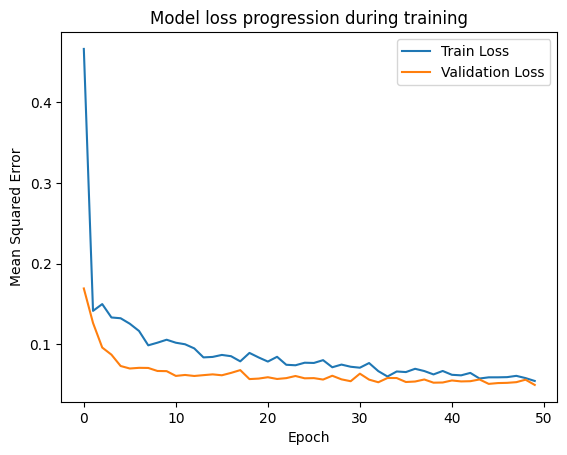

In [40]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss progression during training')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [53]:
# Predicting target variable for the test set
test_predictions_scaled = model.predict(X_test)

# Inverse scaling of test set predictions and actual values
test_predictions = scaler_target.inverse_transform(test_predictions_scaled)
y_test_original = scaler_target.inverse_transform(y_test)

# Create an array of indices for the test dataset
indices_test = np.arange(len(y_test_original))

2/2 [==============================] - 0s 8ms/step


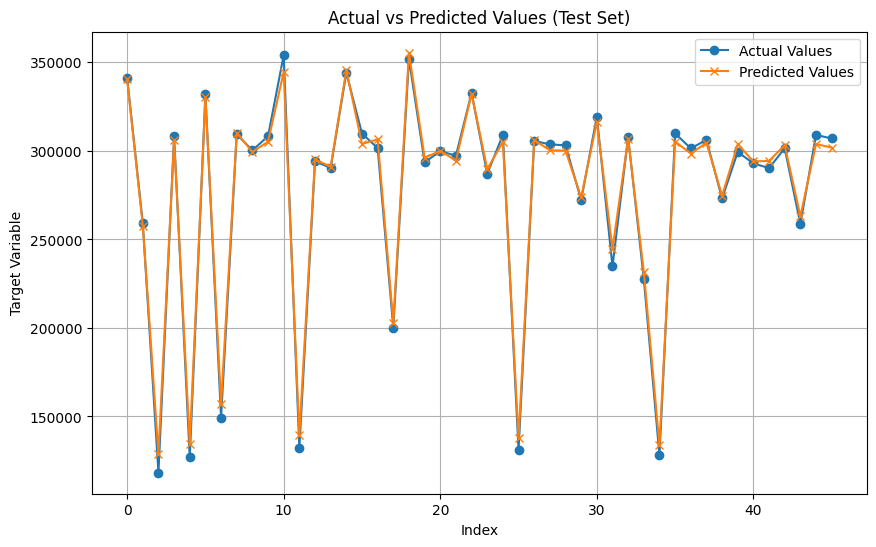

In [54]:
# Plotting actual vs predicted values using a line graph
plt.figure(figsize=(10, 6))
plt.plot(indices_test, y_test_original, label='Actual Values', marker='o')
plt.plot(indices_test, test_predictions, label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()